Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns



Load Dataset 

In [3]:
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

selecting the numeric columns

In [4]:
numerical_columns = ["temperature", "has_children", "toCoupon_GEQ5min", 
                     "toCoupon_GEQ15min", "toCoupon_GEQ25min", "direction_same", 
                     "direction_opp", "Y"]

Detecting outliers using IQR

In [9]:
outliers_iqr = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]


In [13]:
for col in numerical_columns:
    print(outliers_iqr[col])

Series([], Name: temperature, dtype: int64)
Series([], Name: has_children, dtype: int64)
Series([], Name: toCoupon_GEQ5min, dtype: int64)
Series([], Name: toCoupon_GEQ15min, dtype: int64)
16       1
17       1
38       1
39       1
60       1
        ..
12639    1
12652    1
12660    1
12677    1
12682    1
Name: toCoupon_GEQ25min, Length: 1511, dtype: int64
13       1
19       1
35       1
41       1
57       1
        ..
12676    1
12678    1
12679    1
12681    1
12683    1
Name: direction_same, Length: 2724, dtype: int64
13       0
19       0
35       0
41       0
57       0
        ..
12676    0
12678    0
12679    0
12681    0
12683    0
Name: direction_opp, Length: 2724, dtype: int64
Series([], Name: Y, dtype: int64)


according to IQR Direction same ,direction opp and tocoupongeq25min have outliers

Detecting outliers using Z-score

In [6]:
outliers_zscore = {}
threshold = 3  # Common threshold for Z-score
for col in numerical_columns:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers_zscore[col] = df[z_scores > threshold][col]

C:\Users\Vinayak Goel\AppData\Local\Temp\ipykernel_10932\4066438715.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(df[col]))


In [14]:
for col in numerical_columns:
    print(outliers_zscore[col])

Series([], Name: temperature, dtype: int64)
Series([], Name: has_children, dtype: int64)
Series([], Name: toCoupon_GEQ5min, dtype: int64)
Series([], Name: toCoupon_GEQ15min, dtype: int64)
Series([], Name: toCoupon_GEQ25min, dtype: int64)
Series([], Name: direction_same, dtype: int64)
Series([], Name: direction_opp, dtype: int64)
Series([], Name: Y, dtype: int64)


according to Zscore have no outliers

using boxplot

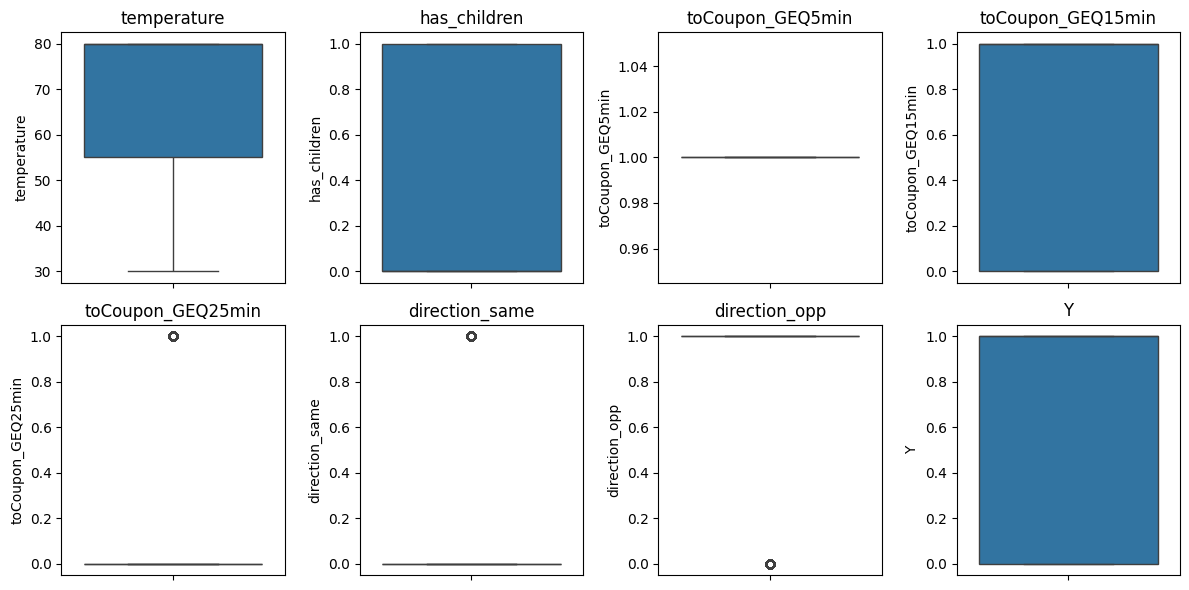

In [15]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


boxplot also shows Direction same ,direction opp and tocoupongeq25min having outliers

Caping extreme values for handling outliers

In [16]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

for col in ["toCoupon_GEQ25min", "direction_same", "direction_opp"]:
    cap_outliers(df, col)

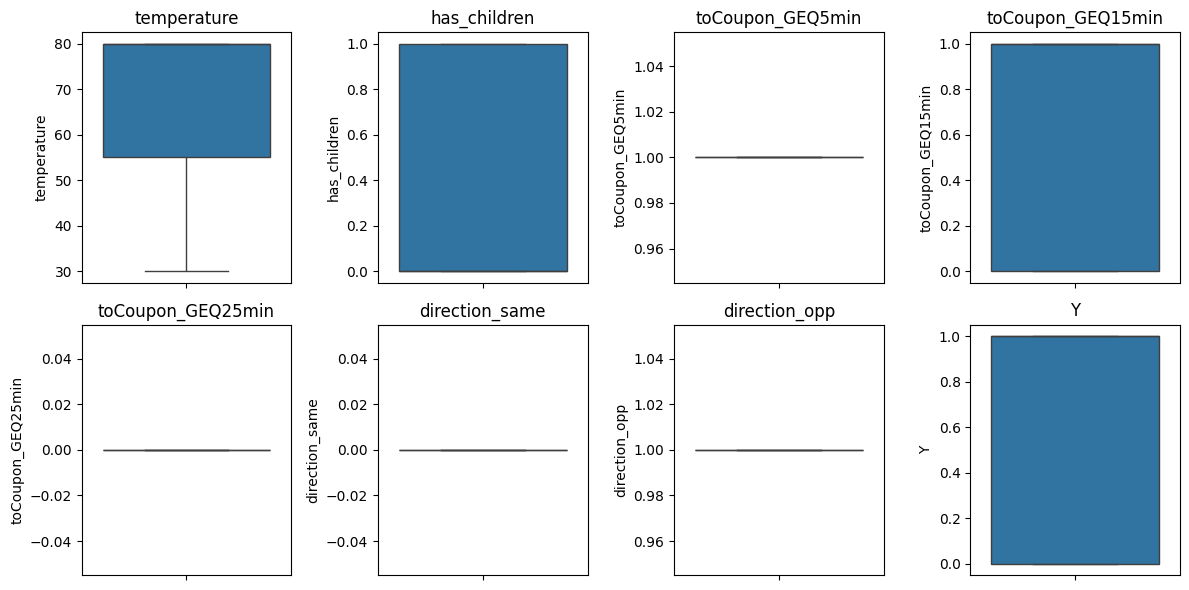

In [17]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Handled Outlieirs

In [18]:
df.to_csv("cleaned_in_vehicle_coupon.csv", index=False)
